# Project 1 - Group 6
###### <font color='gray'>Authors: Aisha Baitemoriva-Othman, Adonis McQueen, Angela Kim, Deja Prade, James Kang</font>

In [1]:
## Import libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Import datasets ##

# Aisha's datasets: Rotten Tomatoes
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz',sep='\t',encoding='latin1')

# Adonis's dataset: Box Office Mojo
df1 = pd.read_csv("data/bom.movie_gross.csv.gz")

# Angela's dataset: The Numbers
mb = pd.read_csv('data/tn.movie_budgets.csv.gz')

# Deja's dataset: TMDB
movie_type = pd.read_csv('data/tmdb.movies.csv.gz')

# James's datasets: IMDB
title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')

### Questions
<ul>
<li>Which movies have the highest gross values?
<li>What are the domestic and worldwide profits?
<li>What is the trend of movie genres over time?
<li>How has average movie runtime changed over time?
</ul>

### Angela's Data Analysis:

In [3]:
## Preliminary analysis
mb.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [4]:
## Checking datatypes and looking for any missing values
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Observations and Insights:**
<ul>
<li>There are 5782 total entries with 0 missing values.
<li>The release date column is the object datatype and should be changed to the datetime datatype.
<li>The production budget, domestic gross, and worldwide gross columns are also object datatypes and should be changed to integer.
</ul>

In [5]:
## Changing release_date to datetime
mb['release_date'] = pd.to_datetime(mb['release_date'])

## Changing production_budget, domestic_gross, and worldwide_gross to integer

mb['production_budget'] = mb['production_budget'].str.replace( ',' , '')
mb['production_budget'] = mb['production_budget'].str.replace( '$' , '')
mb['production_budget'] = pd.to_numeric(mb['production_budget'])

mb['domestic_gross'] = mb['domestic_gross'].str.replace( ',' , '')
mb['domestic_gross'] = mb['domestic_gross'].str.replace( '$' , '')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'])

mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( ',' , '')
mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( '$' , '')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'])


## Check that all changes have been correctly made
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [6]:
print(list(mb['domestic_gross'].sort_values(ascending=False)))

[936662225, 760507625, 700059566, 678815482, 659363944, 652270625, 623279547, 620181382, 608581744, 533720947, 532177324, 504014165, 486295561, 474544677, 460998007, 459005868, 448139099, 441226247, 435110554, 426525952, 424668047, 423315812, 421785283, 417719760, 415004880, 412563408, 408992272, 408084349, 408010692, 404508916, 403706375, 402111870, 400738009, 395708305, 389813101, 381193157, 380529370, 380270577, 377845905, 376057266, 373524485, 370782930, 368384330, 368065385, 364001123, 363070709, 356461711, 353007020, 352390543, 350126372, 342548984, 341268248, 337135885, 336530303, 336045770, 335061807, 334201140, 334191110, 333172112, 330360194, 330151138, 327481748, 325100054, 324591735, 322719944, 319246193, 318604126, 317871467, 317101119, 315544750, 315058289, 312433331, 310676740, 309420425, 309205079, 306169255, 305411224, 304360277, 303003568, 302089278, 300531751, 296623634, 296131568, 293506292, 293004164, 292576195, 292324737, 292137260, 291710957, 291045518, 290271960

**Observations & Insights:**
<ul>
<li>There are a lot of domestic gross values that are 0 that can reasonably be removed from the working dataset.
<li>Rows where the gross is "too low" for our analysis can also reasonably be dropped.
</ul>

In [7]:
## Remove rows with release_date before 2010 to focus on analyzing data from the most recent decade

mb = mb[(mb['release_date']) >= '2010-01-01']

mb.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347


In [8]:
mb.tail(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5717,18,2010-11-12,Tiny Furniture,50000,391674,424149
5719,20,2015-07-31,Counting,50000,8374,8374
5721,22,2014-02-14,Down and Dangerous,50000,0,0
5723,24,2015-08-04,Bending Steel,50000,0,0
5724,25,2015-09-01,"Run, Hide, Die",50000,0,0
5725,26,2014-12-31,The Image Revolution,50000,0,0
5726,27,2013-10-25,A True Story,45000,0,0
5728,29,2013-06-21,This Is Martin Bonner,42000,0,0
5730,31,2010-03-12,The Exploding Girl,40000,25572,25572
5731,32,2011-02-11,Raymond Did It,40000,3632,3632


**Observations & Insights:**
<ul>
<li>There are a lot of gross values that are 0. They also tend to correlate with movies with very small production budgets.
<li>Upon investigation, these films are usually independently made and don't apply to a large corporation like Microsoft.
</ul>

In [10]:
## Create two new columns for domestic profit and worldwide profit
## Remove rows with negative profits

mb['domestic_profit'] = (mb['domestic_gross'] - mb['production_budget'])
mb['worldwide_profit'] = (mb['worldwide_gross'] - mb['production_budget'])
mb.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209,-70975705,355945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923,-99925825,579620923
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,173139099,809439099
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,-61232488,118151347


**Observations & Insights:**
<ul>
<li>There are films that are box office bombs such as Dark Phoenix, The Lone Ranger, and Pirates of the Caribbean: On Strangers Tides. Their production budgets overshadowed their box office revenues.
</ul>

In [11]:
## Sort by highest domestic profits

mb_dp = mb.sort_values(by=['domestic_profit'], ascending=False)
mb_dp.reset_index(inplace=True)
mb_dp.head(30)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
1,41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
2,33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
3,43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711
4,26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
5,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
6,134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706
7,44,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,332177324,849102856
8,537,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,328010692,597923379
9,437,38,2017-12-20,Jumanji: Welcome to the Jungle,90000000,404508916,964496193,314508916,874496193


In [12]:
## Sort by highest worldwide profits

mb_wp = mb.sort_values(by=['worldwide_profit'], ascending=False)
mb_wp.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,163007020,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,256193157,1216693157
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,247719760,1135772799
155,56,2013-11-22,Frozen,150000000,400738009,1272469910,250738009,1122469910
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706


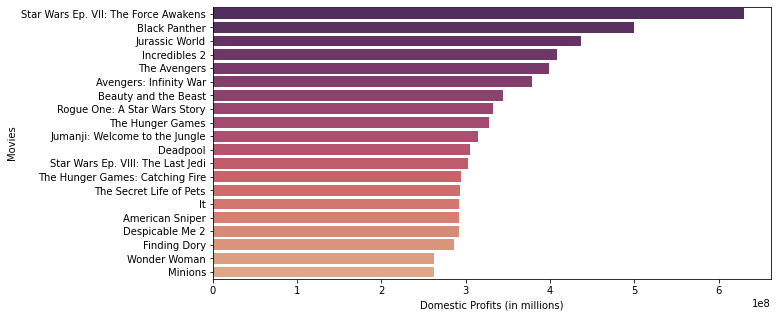

In [14]:
## Bar chart of Top 10 Movies with Highest Domestic Profits

fig, ax = plt.subplots(figsize=(10,5))

x1 = mb_dp['movie'][0:20]
y1 = mb_dp['domestic_profit'][0:20]

ax = sns.barplot(x=y1, y=x1, palette='flare_r')
ax.set(xlabel='Domestic Profits (in millions)', ylabel='Movies');

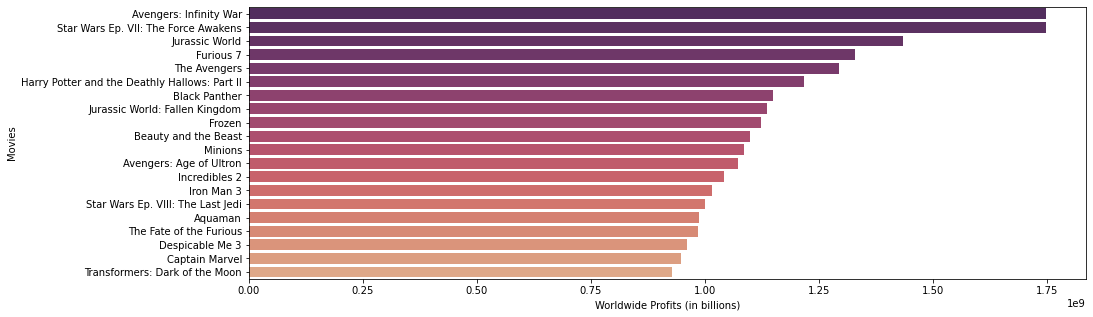

In [15]:
## Bar chart of Top 10 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(15,5))

x2 = mb_wp['movie'][0:20]
y2 = mb_wp['worldwide_profit'][0:20]

ax = sns.barplot(x=y2, y=x2, palette='flare_r')
ax.set(xlabel='Worldwide Profits (in billions)', ylabel='Movies');

#### <b>Observations & Insights:</b>
<ul>
<li>The 10 movies with highest domestic profits from 2010-mid2019 are <b><i>Star Wars Ep. VII: The Force Awakens, Black Panther, Jurassic World, Incredibles 2, The Avengers, Avengers: Infinity War, Beauty and the Beast, Rogue One: A Star Wars Story, The Hunger Games, and Jumanji: Welcome to the Jungle.</i></b>
<li>The 10 movies with highest worldwide profits from 2010-mid2019 are <b><i>Avengers: Infinity War, Star Wars Ep. VII: The Force Awakens, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part II, Black Panther, Jurassic World: Fallen Kingdom, Frozen, and Beauty and the Beast.</i></b>
<li>The most frequently occuring genres of the top 20 films are <b><i>Sci-fi, Action, Adventure, Animation, and Superhero.</i></b>
<li>The majority of these films are part of the <b><i>Marvel</i></b> or <b><i>Star Wars</i></b> franchises.
<li>There has also been a huge focus on revitalizing or reimagining classics such as <b><i>Jurassic Park, James Bond, and Jumanji.</i></b>
<li>Many financially successful films are sequels such as <b><i>Star Wars Ep. VII, Avengers: Infinity War, Furious 7, Harry Potter and the Deathly Hallows: Parts I & II, and Incredibles 2</b></i>
</ul>

### Aisha's Data Analysis:

In [ ]:
df_rt_movie_info.head(3)

In [ ]:
df_rt_movie_info.shape

In [ ]:
# removing the month and day from the theater_date and create a new column with just the year of the release date
df_rt_movie_info['new_theater_date'] = df_rt_movie_info.theater_date.str[-4:]

In [ ]:
# convert the values in the 'new_theater_date' column from strings to integers
df_rt_movie_info['new_theater_date'] = df_rt_movie_info['new_theater_date'].apply(pd.to_numeric)

In [ ]:
df_rt_movie_info.head(3)

In [ ]:
# there are 494 out of 1560 rows that have a missing studio value

df_rt_movie_info['studio'].isna().value_counts()

In [ ]:
# all the studios listed
df_rt_movie_info['studio'].value_counts().head() 

In [ ]:
df_rt_reviews.head(10)

In [ ]:
df_rt_reviews[df_rt_reviews['rating'].isna()]

In [ ]:
#split the "rating" column into two separate columns, separating them in "/" if the rating is not a letter
df_rt_reviews[['fn','sn']] = df_rt_reviews['rating'].str.split('/',expand=True)

In [ ]:
df_rt_reviews.head()

In [ ]:
# replace the null values in the 'sn'(second number) with number 1. The row of the column 'sn' has a null value 
# only if the corresponding 'rating' column has a letter rating.
df_rt_reviews['sn'] = df_rt_reviews.sn.apply(lambda x: x if not pd.isnull(x) else 1)

In [ ]:
# The letters we have: A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F+,F,F-
# A+ gets 1, A gets 93.34, A- gets 86.68, B+ gets 80.02, B gets 73.36, B- gets 66.7, 
#C+ gets 60.04
# C gets 53.38, C- gets 46.72, D+ gets 40.06, D gets 33.4, D- gets 26.74
# F+ gets 20.08, F gets 13.42, F- gets 6.66

In [ ]:
# replacing the letter ratings with the appropriate percentage explained in the above cell
df_rt_reviews['fn'] = df_rt_reviews['fn'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-'],[1,0.9334,0.8668,0.8002,0.7336,0.667,0.6004,0.5338,0.4672,0.4006,0.334,0.2674,0.2008,0.1342,0.666])

In [ ]:
# deleting a row with an outlier value in the 'fn' column which is giving an error 
# when trying to convert all string values into numeric values
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'N']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'R']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '1-5']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'T']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '3 1']

In [ ]:
# converting all string values in the 'fn' and 'sn' columns into numeric values
df_rt_reviews['fn'] = df_rt_reviews['fn'].apply(pd.to_numeric)
df_rt_reviews['sn'] = df_rt_reviews['sn'].apply(pd.to_numeric)

In [ ]:
df_rt_reviews['new_rating'] = df_rt_reviews.apply(lambda row: row.fn/row.sn, axis=1)

In [ ]:
# delete rows that have a new_rating value higher than 1
df_rt_reviews = df_rt_reviews[df_rt_reviews.new_rating <=1]

In [ ]:
df_rt_reviews.head()

In [ ]:
#creating a new dataset with only 'id' and 'new_rating' columns of the 'df_rt_reviews' dataset
# so we can merge it later on with the 'df_rt_movie_info' dataset.
new_rt_reviews = pd.DataFrame(zip(df_rt_reviews.id, df_rt_reviews.new_rating))

In [ ]:
# renaming the columns back into original names
new_rt_reviews.rename(columns={0: 'id', 1: 'rating'}, inplace=True)

In [ ]:
new_rt_reviews.head()

In [ ]:
df_rt_movie_info.head()

In [ ]:
new_rt_movie_info= pd.DataFrame(zip(df_rt_movie_info.id, df_rt_movie_info.genre,df_rt_movie_info.runtime))

In [ ]:
new_rt_movie_info.head()

In [ ]:
# renaming the columns back into original names
new_rt_movie_info.rename(columns={0: 'id', 1: 'genres',2: 'runtime'}, inplace=True)

In [ ]:
new_rt_movie_info.head()

In [ ]:
# left joining the new_rt_movie_info to new_rt_reviews
merged_datasets = pd.merge(new_rt_reviews,new_rt_movie_info,on='id',how='left')

In [ ]:
merged_datasets.head()

In [ ]:
# first step in splitting the genres of each row into separate rows for each genre of each movie: 
# we are creating a list out of each genres string such as this: 'Action and Adventure|Classics|Drama'
merged_datasets['genres']=merged_datasets['genres'].str.split('|')

In [ ]:
# second step in splitting the genres of each row into separate rows for each genre of each movie: 
merged_datasets = merged_datasets.explode('genres')

In [ ]:
merged_datasets.head()

In [ ]:
# getting rid of text characters in the 'runtime' column 
merged_datasets['runtime'] = merged_datasets['runtime'].str.replace(' minutes','')

In [ ]:
# converting the 'runtime' column's strings values into floats
merged_datasets['runtime'] = pd.to_numeric(merged_datasets['runtime'])

In [ ]:
merged_datasets.info()

In [ ]:
merged_datasets['genres'].value_counts()
# the value count of movies by genre. The last four genre categories are too low in numbers compared to
# other movie genres
# We think it is best to remove them from our dataset

In [ ]:
# creating a list of genres that are not statistically significant
not_significant_genres_list = ['Anime and Manga','Gay and Lesbian','Cult Movies','Faith and Spirituality','Television','Sports and Fitness','Documentary','Western','Special Interest']

In [ ]:
# deleting the not statistically insignificant genres from the dataset and creating a new dataset without those genres
new_merged_datasets = merged_datasets[~merged_datasets.genres.isin(not_significant_genres_list)]

In [ ]:
new_merged_datasets['genres'].value_counts()

In [ ]:
# finding the mean of runtime for each genre
average_runtime_per_genre = new_merged_datasets.groupby('genres', as_index=False)['runtime'].mean()
average_runtime_per_genre

In [ ]:
# renaming the 'runtime' column into the 'mean_runtime'
average_runtime_per_genre.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

In [ ]:
# finding the mean of the ratings for each genre
average_rating_per_genre = new_merged_datasets.groupby('genres', as_index=False)['rating'].mean()
average_rating_per_genre

In [ ]:
# renaming the "rating" column into the 'mean_rating'
average_rating_per_genre.rename(columns={'rating': 'mean_rating'}, inplace=True)

In [ ]:
average_runtime_per_genre

In [ ]:
average_rating_per_genre

In [ ]:
fig, ax11 = plt.subplots(figsize = (20,8))
x11 = average_rating_per_genre['genres']
y11 = average_rating_per_genre['mean_rating']
ax11.bar(x1,y1)
ax11.set_title('average rating per genre')
ax11.set_xlabel('genres')
ax11.set_ylabel('average rating')
plt.xticks(rotation = 45)

In [ ]:
# The 4 genres that have the highest average ratings: 'Romance', 'Art House and International', 'Drama',
#  and 'Mystery and Suspense'

In [ ]:
# creating a list of the four genres with the highest rating
four_genres_list = ['Romance','Art House and International','Drama','Mystery and Suspense']

In [ ]:
# creating a dataset with only the four genres with the highest ratings
highest_rating_genres_dataset = merged_datasets[merged_datasets.genres.isin(four_genres_list)]

In [ ]:
highest_rating_genres_dataset['genres'].value_counts()

In [ ]:
# the mean of runtime for the four highest rating genres
highest_rating_genres_dataset['runtime'].mean()

In [ ]:
# standard deviation from the mean for the four highest rating genres
highest_rating_genres_dataset['runtime'].std()

In [ ]:
# getting an average runtime for each of the four highest rating genres
avg_runtime_high_rating_genres = highest_rating_genres_dataset.groupby('genres', as_index=False)['runtime'].mean()

In [ ]:
# renaming the 'runtime' column of the new dataset into the "mean_runtime" 
avg_runtime_high_rating_genres.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

In [ ]:
avg_runtime_high_rating_genres

In [ ]:
fig, ax22 = plt.subplots(figsize = (12,6))
x22 = avg_runtime_high_rating_genres['genres']
y22 = avg_runtime_high_rating_genres['mean_runtime']
ax22.bar(x2,y2)
ax22.set_title('average runtime per genre')
ax22.set_xlabel('genres')
ax22.set_ylabel('average rating')
plt.xticks(rotation = 45);